## Predicción Coronavirus SVM y Random Forest

Vamos a intentar predecir si una persona tiene o no coronavirus mediante el SVM y el Random Forest Classifier y luego realizaremos una comparación de ambos modelos

### Importación Librerias

In [323]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import svm 
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

### Carga de datos

In [325]:
data = pd.read_csv("C:/Users/pauri/OneDrive/Escritorio/PYTHON PROJECTS/PROYECTOS/SVM Coronavirus/corona.csv")
data

C:\Users\pauri\AppData\Local\Temp\ipykernel_39608\309489006.py:1: DtypeWarning: Columns (2,3,4,5,6,8) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("C:/Users/pauri/OneDrive/Escritorio/PYTHON PROJECTS/PROYECTOS/SVM Coronavirus/corona.csv")


,Ind_ID,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
0,1,11-03-2020,True,False,True,False,False,negative,NaN,NaN,Abroad
1,2,11-03-2020,False,True,False,False,False,positive,NaN,NaN,Abroad
2,3,11-03-2020,False,True,False,False,False,positive,NaN,NaN,Abroad
3,4,11-03-2020,True,False,False,False,False,negative,NaN,NaN,Abroad
4,5,11-03-2020,True,False,False,False,False,negative,NaN,NaN,Contact with confirmed
...,...,...,...,...,...,...,...,...,...,...,...
278843,278844,30-04-2020,False,False,False,False,False,positive,NaN,male,Other
278844,278845,30-04-2020,False,False,False,False,False,negative,NaN,female,Other
278845,278846,30-04-2020,False,False,False,False,False,negative,NaN,male,Other
278846,278847,30-04-2020,False,False,False,False,False,negative,NaN,male,Other


In [326]:
data.isnull().sum()

Ind_ID                      0
Test_date                   0
Cough_symptoms            252
Fever                     252
Sore_throat                 1
Shortness_of_breath         1
Headache                    1
Corona                      0
Age_60_above           127320
Sex                     19563
Known_contact               0
dtype: int64

Eliminamos valores nulos.

In [328]:
data = data.dropna()

In [329]:
data.head()

,Ind_ID,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
13727,13728,22-03-2020,True,False,False,False,False,negative,No,male,Abroad
13728,13729,22-03-2020,True,False,False,False,False,negative,No,female,Abroad
13730,13731,22-03-2020,True,True,False,False,False,positive,Yes,female,Other
13731,13732,22-03-2020,False,False,False,False,False,other,No,female,Other
13732,13733,22-03-2020,False,False,False,False,False,other,No,female,Other


Eliminamos ID, Test_date y si el contacto se conoce, pues consideramos que son variables inecesarias.

In [331]:
data = data.drop(["Ind_ID","Test_date","Known_contact"],axis=1)
data

,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex
13727,True,False,False,False,False,negative,No,male
13728,True,False,False,False,False,negative,No,female
13730,True,True,False,False,False,positive,Yes,female
13731,False,False,False,False,False,other,No,female
13732,False,False,False,False,False,other,No,female
...,...,...,...,...,...,...,...,...
156035,True,False,True,False,False,negative,Yes,male
156036,True,False,True,True,False,negative,No,male
156037,True,True,False,False,False,negative,No,female
156038,False,False,False,False,False,negative,No,male


Explicación de los datos:

* Cough_symptoms= Sintomas de tos
* Fever = Fiebre
* Sore_throat = Dolor de garganta
* Shortness of Breath = Dificultad para respirar
* Headache = Dolor de cabeza
* Corona = Resultado de la prueba
* Age_60_above = Edad superior a 60
* Sex = Sexo

### Visualización de datos

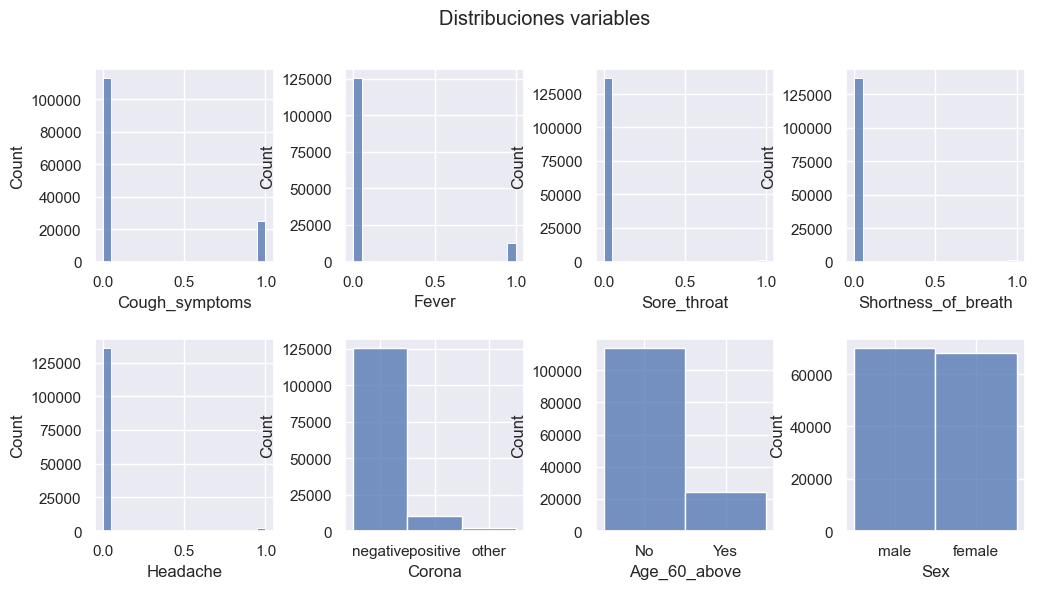

In [334]:
num_rows = 2
num_columns = 4 

fig, axes = plt.subplots(num_rows,num_columns,figsize=(12,6))
axes = axes.flatten()

for i, column in enumerate(data.columns):
    sns.histplot(data[column],ax=axes[i])
plt.suptitle("Distribuciones variables")
plt.subplots_adjust(wspace=0.4, hspace=0.4)


### Transformación de variables categorícas


Vamos a transformar todos los valores en números otorgando un 1 en caso de True y un 0 en caso de False. Para la variable corona, asumiermos un 1 en positive, un 0 en negative y un 1 en other, pues consideraremos que debemos realizar de nuevo la prueba puesto que es inconcluyente. 

Para los mayores de 60 le otorgamos un 1 y para los hombres un 1 mientras que para las mujeres un 0.

In [337]:
data["Cough_symptoms"] = data["Cough_symptoms"].astype(int)
data["Fever"] = data["Fever"].astype(int)
data["Sore_throat"] = data["Sore_throat"].astype(int)
data["Shortness_of_breath"] = data["Shortness_of_breath"].astype(int)
data["Headache"] = data["Headache"].astype(int)
data["Corona"] = data["Corona"].map({"positive":1,"negative":0,"other":1})
data["Age_60_above"] = data["Age_60_above"].map({"Yes":1,"No":0})
data["Sex"] = data["Sex"].map({"male":1,"female":0})
data.head()

,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex
13727,1,0,0,0,0,0,0,1
13728,1,0,0,0,0,0,0,0
13730,1,1,0,0,0,1,1,0
13731,0,0,0,0,0,1,0,0
13732,0,0,0,0,0,1,0,0


### Correlación de variables

<Axes: >

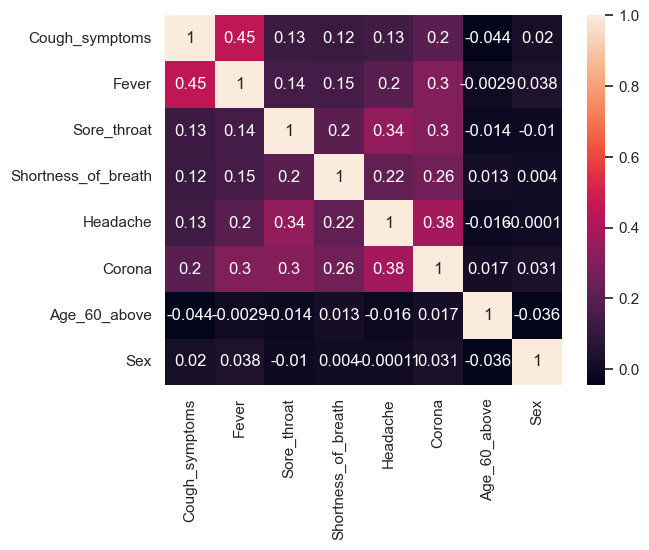

In [339]:
sns.heatmap(data.corr(),annot=True)

Podemos observar como las variables Age_60_above y Sex no son relevantes al determinar si una persona tiene Corona virus o no. Por lo tanto, para simplificar el modelo, vamos a eliminarlas.

In [341]:
data.drop(["Age_60_above","Sex"],inplace=True,axis=1)
data.head()

,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona
13727,1,0,0,0,0,0
13728,1,0,0,0,0,0
13730,1,1,0,0,0,1
13731,0,0,0,0,0,1
13732,0,0,0,0,0,1


### Separación datos entrenamiento y datos testeo

In [343]:
X = data.drop(["Corona"],axis=1)
y = data["Corona"]

In [344]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=123456789)

### Entrenamiento Random Forest

In [346]:
modelo_rf = RandomForestClassifier()

In [347]:
modelo_rf.fit(X_train,y_train)

RandomForestClassifier()

### Evaluación Random Forest 

In [349]:
modelo_rf_predicciones = modelo_rf.predict(X_test)
modelo_rf_predicciones

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [350]:
accuracy_rf = accuracy_score(modelo_rf_predicciones,y_test)
accuracy_rf

0.9329103541445527

El Random Forest tiene una capacidad predictiva del 93%.

### Entrenamiento SVM

In [353]:
modelo_svm = svm.SVC(kernel="linear")

In [354]:
modelo_svm.fit(X_train,y_train)

SVC(kernel='linear')

### Evaluación SVM

In [356]:
modelo_svm_predicciones = modelo_svm.predict(X_test)
modelo_svm_predicciones

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [357]:
accuracy_svm = accuracy_score(modelo_svm_predicciones,y_test)
accuracy_svm

0.9329103541445527

El SVM tiene una capacidad de predicción del 93%, exactamente la misma que en el Random Forest. 

Esto se debe a que los tienen un límite en la cantidad de información, lo  que significa que el punto óptimo de predicción es del 93%. 